### **Exercise - Decision Tree Classifier for Credit Risk Prediction**

#### Problem Statement

* We will develop a Machine Learning Classification Model that can assess the credit risk of loan applicants. 

* The goal is to predict whether an applicant is **'High Risk'** (1) or **'Low Risk'** (0) based on their financial and personal information. 

* We will use a **Decision Tree** model for this task because its transparent, flowchart-like structure makes it easy to explain the reasons behind a loan approval or denial to stakeholders and regulators.

### Necessary Steps to be Performed 

1.  **Import Libraries, Load and Explore the Dataset**: Import the necessary libraries, Load and Expore the dataset for credit risk analysis.
2.  **Data Preprocessing**: Prepare the data for the model by converting categorical features into a numerical format.
3.  **Define Features and Target**: Separate the dataset into feature variables (`X`) and the target variable (`y`).
4.  **Split Data**: Divide the data into a training set and a testing set.
5.  **Create and Train Model**: Instantiate a `DecisionTreeClassifier` and train it on the training data.
6.  **Evaluate Model Performance**: Test the model's accuracy on the unseen data.
7.  **Visualize the Decision Tree**: Plot the trained model to understand its decision-making logic.
8.  **Make Predictions**: Use the model to predict the credit risk for a new applicant.


### Step 1: Import Libraries and Create Dataset

* First, we'll import the essential libraries and then load the dataset for credit risk analysis.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv('credit_risk.csv')

print("--- First 5 rows of the dataset ---")
df.head()

--- First 5 rows of the dataset ---


,age,income,credit_history,loan_amount,credit_risk
0,53,87,Fair,22,0
1,39,51,Good,9,0
2,32,108,Good,29,0
3,45,76,Good,6,0
4,43,71,Good,14,0


In [3]:
print("\n--- Dataset info ---")
df.info()


--- Dataset info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             200 non-null    int64 
 1   income          200 non-null    int64 
 2   credit_history  200 non-null    object
 3   loan_amount     200 non-null    int64 
 4   credit_risk     200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Step 2: Data Preprocessing

* Decision Tree models in scikit-learn work with numerical data. 

* Our dataset `credit_risk.csv` contains a categorical feature, `credit_history`, which needs to be converted into a numerical format. 

* We will use `LabelEncoder` to transform 'Good', 'Fair', and 'Poor' into numerical values.

In [4]:
# Create a LabelEncoder instance
le_credit_history = LabelEncoder()

# Apply LabelEncoder to the 'credit_history' column
df['credit_history_n'] = le_credit_history.fit_transform(df['credit_history'])

# Display the DataFrame with the new numerical column
print("--- DataFrame after Label Encoding ---")
df.head()


--- DataFrame after Label Encoding ---


,age,income,credit_history,loan_amount,credit_risk,credit_history_n
0,53,87,Fair,22,0,0
1,39,51,Good,9,0,1
2,32,108,Good,29,0,1
3,45,76,Good,6,0,1
4,43,71,Good,14,0,1


### Step 3: Define Features and Target

* We now separate our data into features (`X`) and the target variable (`y`). 

* The features will be the numerical columns we use to make predictions, and the target will be the `credit_risk` column we want to predict.

In [5]:
# Define features (X) using the numerical columns
X = df[['age', 'income', 'credit_history_n', 'loan_amount']]
y = df['credit_risk']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (200, 4)
Target (y) shape: (200,)


### Step 4: Split Data into Training and Testing Sets

* To evaluate our model's performance on unseen data, we'll split the dataset into a training set (80%) and a testing set (20%).

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {len(X_train)}")
print(f"Testing data size: {len(X_test)}")

Training data size: 160
Testing data size: 40


### Step 5: Create and Train the Model

* We'll create an instance of the `DecisionTreeClassifier` and use the `fit()` method to train it. 

* To make the tree simple and easy to interpret, we will limit its `max_depth` to 3.

In [7]:
# Create a Decision Tree Classifier instance with a max depth of 3
model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


### Step 6: Evaluate Model Performance

* After training, we use the `score()` method to calculate the model's accuracy on the testing data. 

* A high accuracy score indicates that our model has successfully learned the patterns in the data.

In [8]:
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy on Test Data: {accuracy:.2f}")

Model Accuracy on Test Data: 0.80


### Step 7: Visualize the Decision Tree

* The Decision Tree's greatest strength is its interpretability. 

* By visualizing the tree, we can see the exact features and thresholds the model uses to make its decisions.

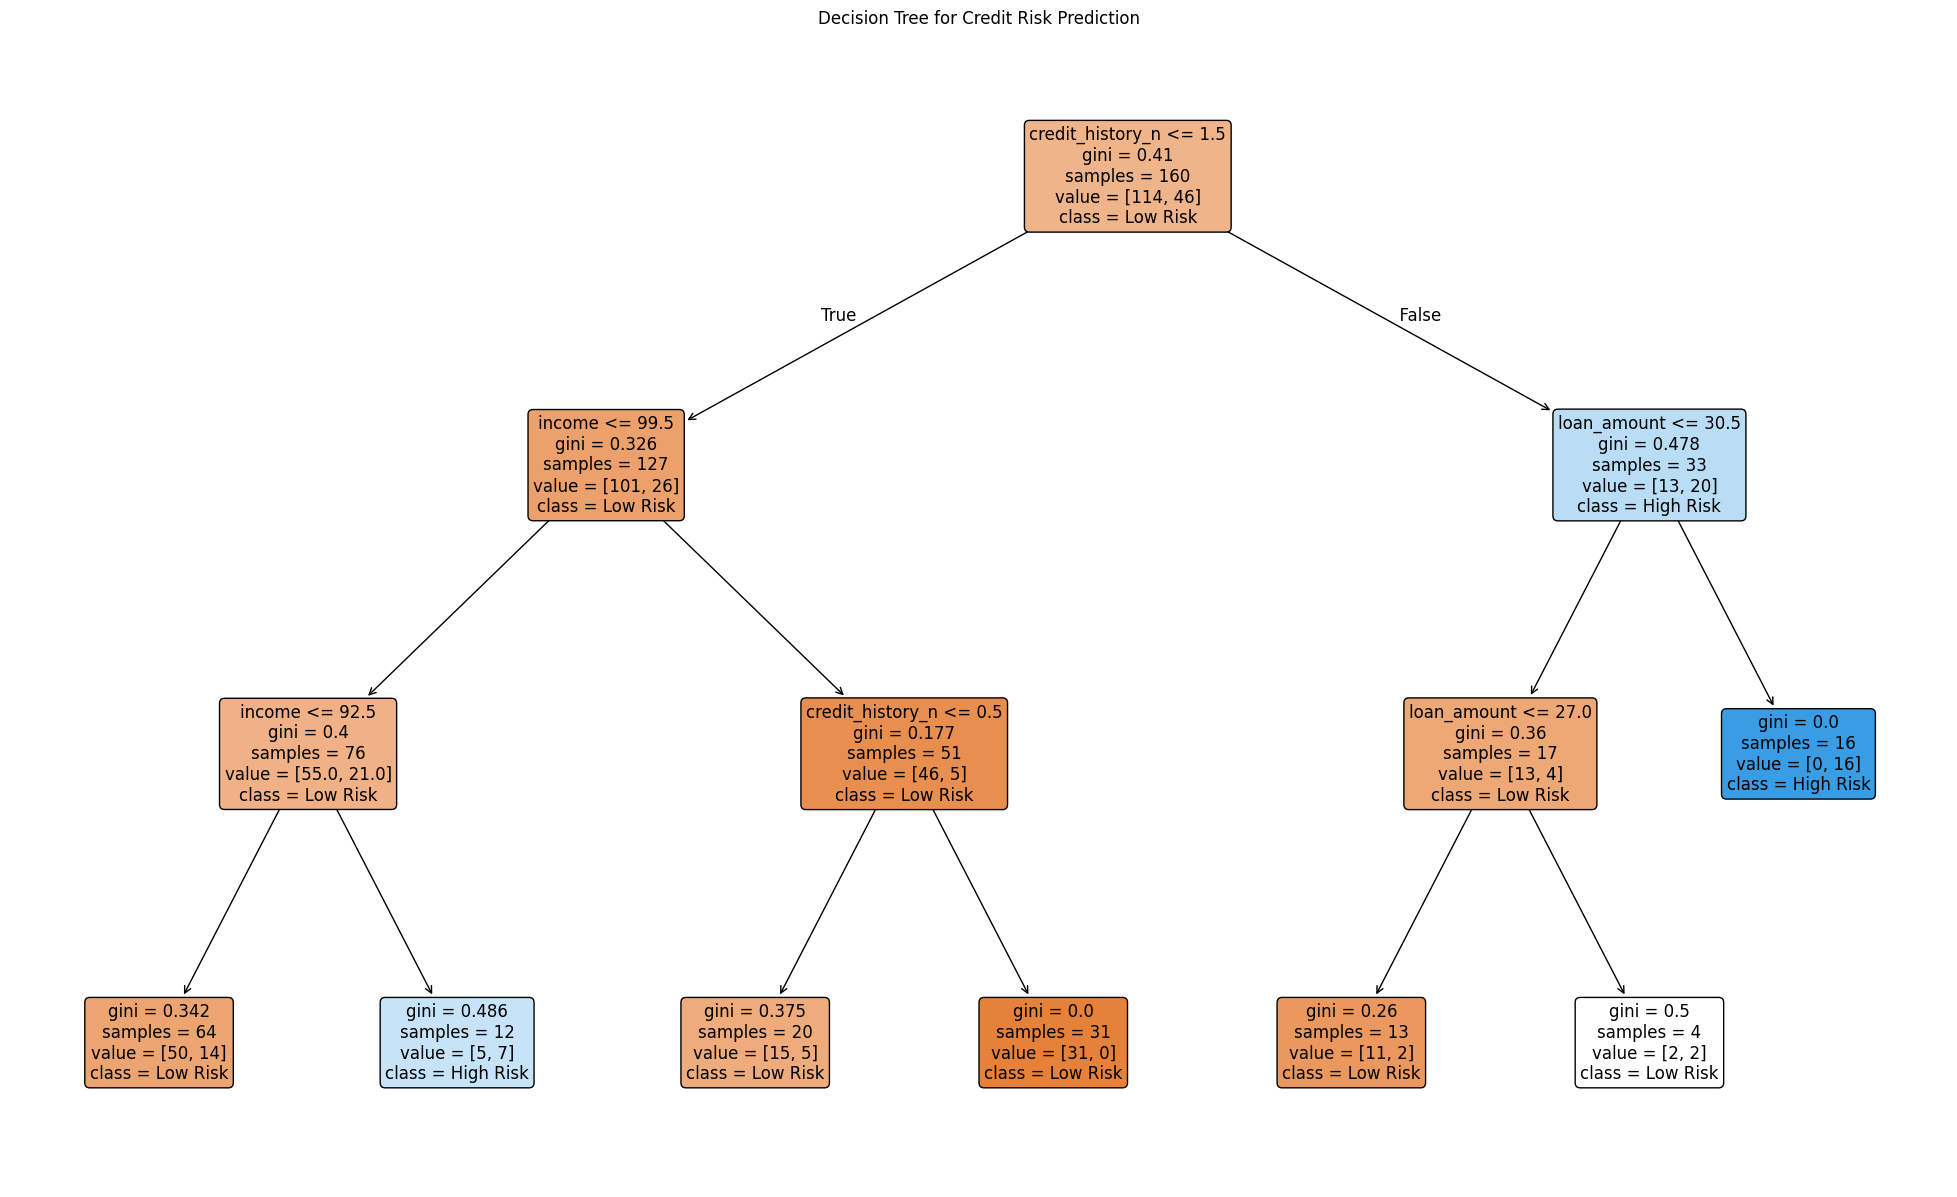

In [9]:
plt.figure(figsize=(25, 15))
plot_tree(model, 
          filled=True, 
          rounded=True, 
          feature_names=X.columns, 
          class_names=['Low Risk', 'High Risk'], 
          fontsize=12)
plt.title('Decision Tree for Credit Risk Prediction')
plt.show()

### Step 8: Make Predictions for a New Applicant

* Finally, we can use our trained model to predict the credit risk for a new, hypothetical loan applicant.

In [10]:
# Create a hypothetical new applicant's data
# Features: age=30, income=65, credit_history=Fair (n=0), loan_amount=35
new_applicant = pd.DataFrame({
    'age': [30],
    'income': [65],
    'credit_history_n': [0],
    'loan_amount': [35]
})

# Make a prediction
prediction = model.predict(new_applicant)

if prediction[0] == 1:
    print("This applicant is predicted to be HIGH RISK.")
else:
    print("This applicant is predicted to be LOW RISK.")

This applicant is predicted to be LOW RISK.


### Summary

* In this notebook, we've successfully built and trained a Decision Tree classifier to predict credit risk. We were able to: 

  * **Handle Categorical Data**: We used `LabelEncoder` to transform a categorical feature into a numerical one, a common step in data preprocessing.

  * **Understand the Logic**: By visualizing the tree, we can see the clear rules the model uses. For example, a poor credit history (`credit_history_n=2`) might be a strong indicator of high risk. 

  * **Evaluate Performance**: We calculated an accuracy score to measure the model's effectiveness on unseen data. 

  * **Make Predictions**: We used the trained model to make a prediction for a new applicant, demonstrating its practical application in a business context. 

* This exercise highlights the interpretability and power of Decision Trees for classification problems.

---